In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [18]:
df = pd.read_csv('gasses-2014-2019.csv')

In [19]:
df.columns

Index(['year(dateGMT)', 'dayofyear(dateGMT)', 'avg(Carbon monoxide)',
       'avg(Sulfur dioxide)', 'avg(Ozone)', 'avg(Nitrogen dioxide (NO2))',
       'features'],
      dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3cdb4ff10>,
      dtype=object)

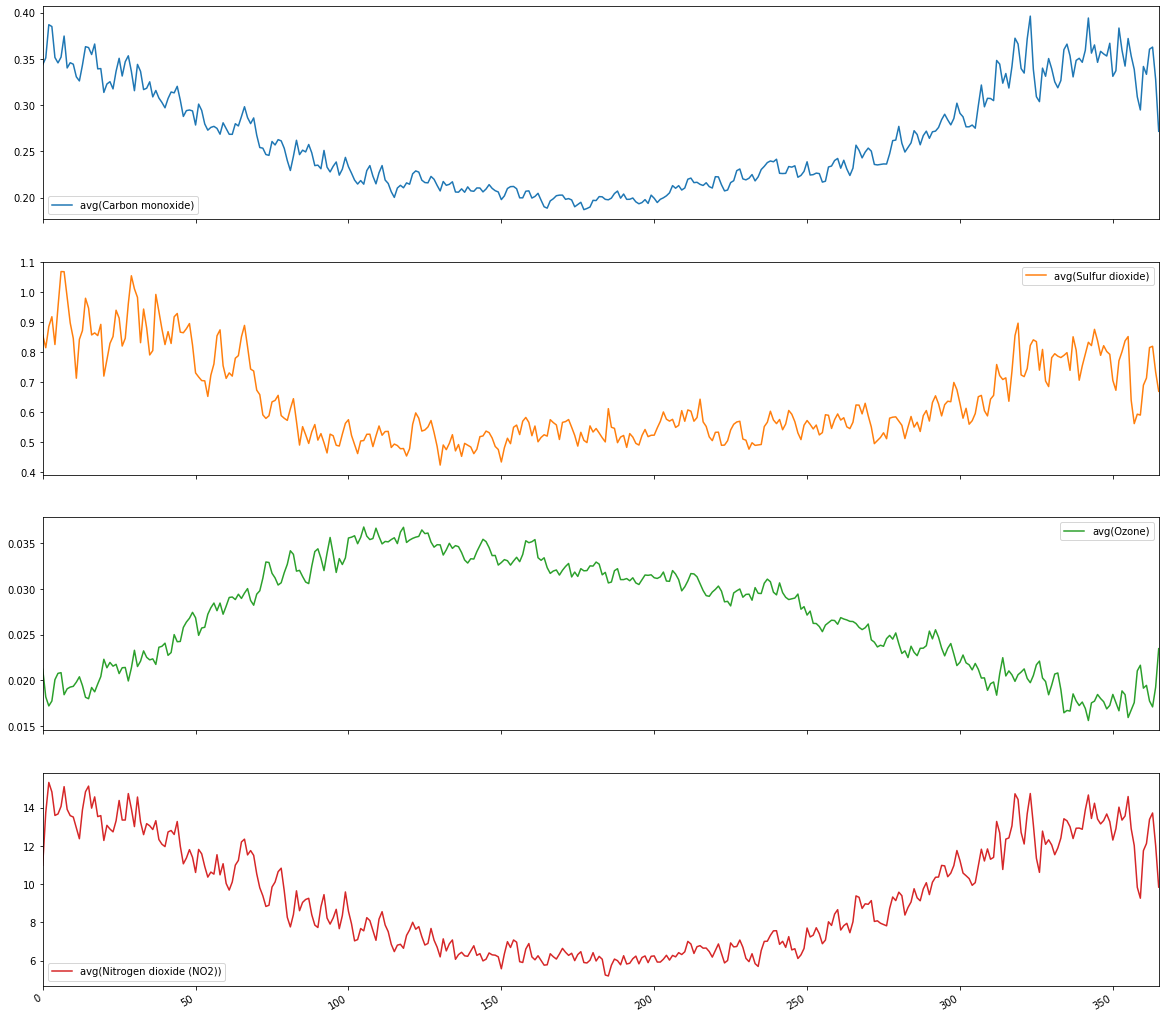

In [20]:
df \
.groupby('dayofyear(dateGMT)') \
.mean() \
.drop(['year(dateGMT)'], 1) \
.reset_index(drop=True) \
.plot.line(subplots=True, figsize=(20,20))

In [58]:
cols = ['avg(Carbon monoxide)',
       'avg(Sulfur dioxide)', 'avg(Ozone)', 'avg(Nitrogen dioxide (NO2))']
arr = df['features'].apply(lambda x: np.array(x[1:-1].split(',')).astype(np.double).tolist()).to_list()
features = pd.DataFrame(arr, columns=cols)
features['day'] = df['dayofyear(dateGMT)']
features

,avg(Carbon monoxide),avg(Sulfur dioxide),avg(Ozone),avg(Nitrogen dioxide (NO2)),day
0,0.173605,0.218948,0.038844,0.263394,71
1,-0.277740,-0.170554,0.439009,-0.352688,181
2,0.000686,-0.147191,0.003611,0.158163,54
3,-0.218013,0.078513,0.264580,-0.184159,209
4,-0.126082,-0.143410,-0.324486,-0.090160,257
...,...,...,...,...,...
1942,-0.029385,0.084093,0.591943,-0.013343,122
1943,-0.054899,-0.304604,0.243882,-0.022253,93
1944,-0.331704,-0.060153,0.084179,-0.310168,197
1945,0.194197,0.548056,-0.108181,0.413404,66


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3c275f3d0>,
      dtype=object)

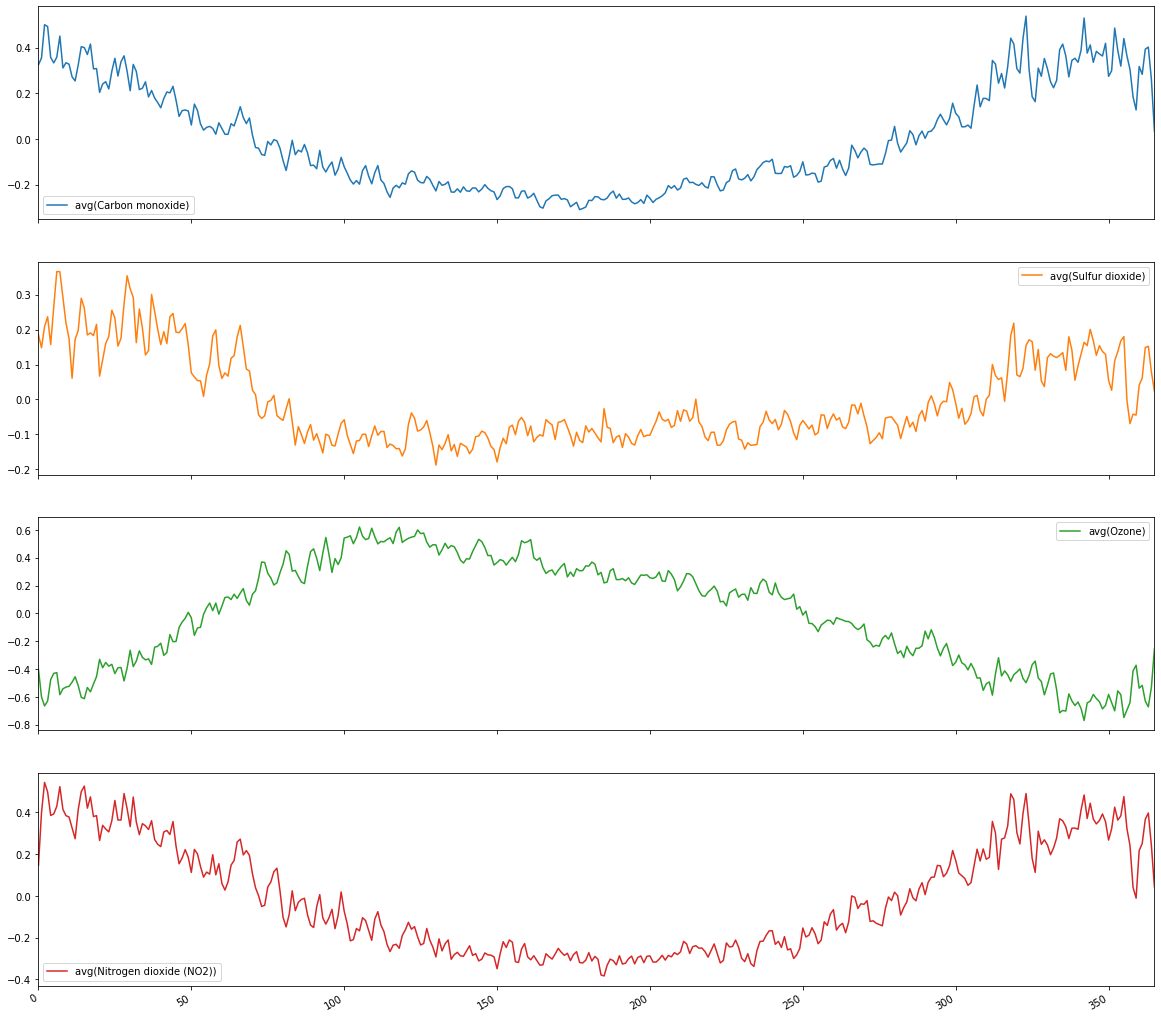

In [60]:
features \
.groupby('day') \
.mean() \
.reset_index(drop=True) \
.plot.line(subplots=True, figsize=(20,20))

In [64]:
magnitudes = [np.linalg.norm(r ,2) for r in features.groupby('day').mean().values]

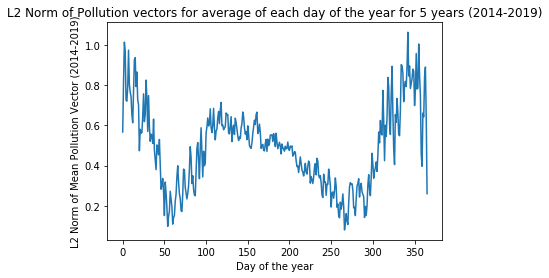

In [71]:
%matplotlib inline
plt.plot(magnitudes)
plt.title("L2 Norm of Pollution vectors for average of each day of the year for 5 years (2014-2019)")
plt.xlabel("Day of the year")
plt.ylabel("L2 Norm of Mean Pollution Vector (2014-2019)")
plt.show()